<a href="https://colab.research.google.com/github/rayehaarika597/diabetes_prediction/blob/main/Diabetes_prediction_SVM__Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# **Data Collection and Analysis**

PIMA Diabetes Dataset [Kaggle Link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)


In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 0 --> Non-Diabetic

# 1 --> Diabetic

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: >

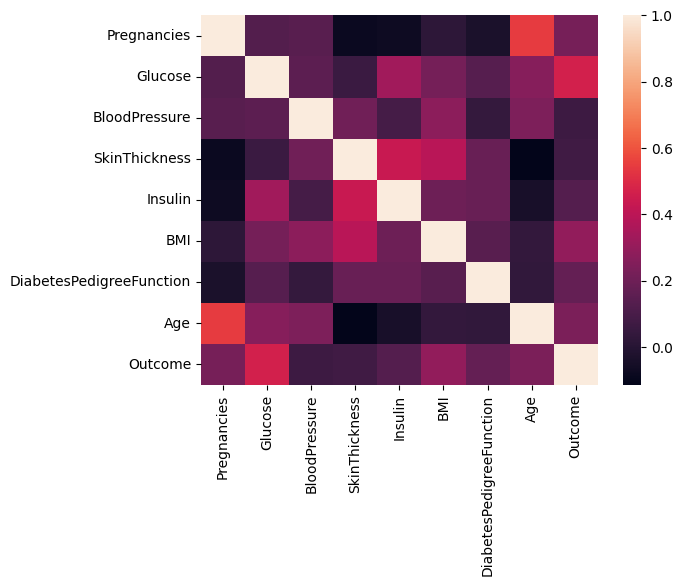

In [11]:
import seaborn as sns
sns.heatmap(diabetes_dataset.corr())

In [13]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# **Train Test Split**

80:20 ratio


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# **Training the Model**



SUPPORT VECTOR MACHINES


In [36]:
#SVM
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


LOGISTIC REGRESSION

In [29]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("logistic regression training accuracy:")
log_train=print(accuracy_score(Y_train, log_reg.predict(X_train)))
print("logistic regression testing accuracy:")
log_reg_acc = accuracy_score(Y_test, log_reg.predict(X_test))
print(log_reg_acc)

logistic regression training accuracy:
0.7850162866449512
logistic regression testing accuracy:
0.7532467532467533


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBOOST CLASSIFIER

In [23]:
from xgboost import XGBClassifier 

xgb = XGBClassifier()

xgb.fit(X_train, Y_train)
xg_y_pred = xgb.predict(X_test)
print(accuracy_score(Y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(Y_test, xg_y_pred)
print(xgb_acc)


1.0
0.7532467532467533


RANDOM FOREST CLASSIFIER


In [25]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, Y_train)
y_rf_pred = rand_clf.predict(X_test)

print("training accuracy of random forest:")
print(accuracy_score(Y_train, rand_clf.predict(X_train)))
print("testing accuracy of random forest:")
ran_clf_acc = accuracy_score(Y_test, y_rf_pred)
print(ran_clf_acc)

training accuracy of random forest:
1.0
testing accuracy of random forest:
0.7467532467532467


K NEAREST NEIGHBOURS CLASSIFIER

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_knn_pred = knn.predict(X_test)
print("knn training accuracy:")
print(accuracy_score(Y_train, knn.predict(X_train)))
print("knn testing accuracy:")
knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(knn_acc)

knn training accuracy:
0.7980456026058632
knn testing accuracy:
0.7272727272727273


**ACCURACIES OF THE MODELS TRAINED ON THIS DATASET**


K-Nearest Neighbour : 72%

Random Forest : 74%

XGBoost :75%

logistic regression : 75%

SVM : 78%


Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
